Epoch 1/5
1563/1563 [==============================] - 45s 28ms/step - loss: 1.7619 - accuracy: 0.3433 - val_loss: 1.3858 - val_accuracy: 0.5172
Epoch 2/5
1563/1563 [==============================] - 43s 28ms/step - loss: 1.5045 - accuracy: 0.4544 - val_loss: 1.2631 - val_accuracy: 0.5658
Epoch 3/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4076 - accuracy: 0.4919 - val_loss: 1.1821 - val_accuracy: 0.6024
Epoch 4/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.3313 - accuracy: 0.5238 - val_loss: 1.1217 - val_accuracy: 0.6234
Epoch 5/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.2772 - accuracy: 0.5473 - val_loss: 1.0591 - val_accuracy: 0.6378


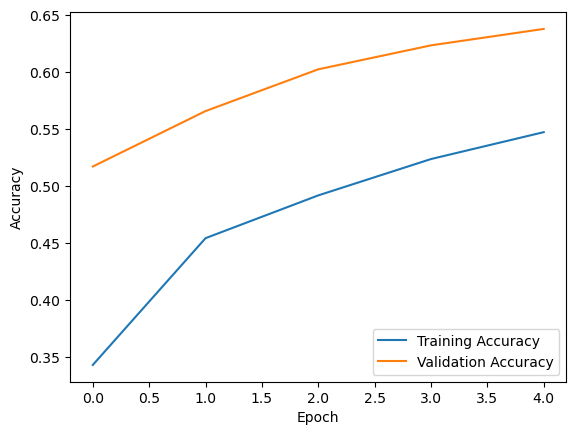

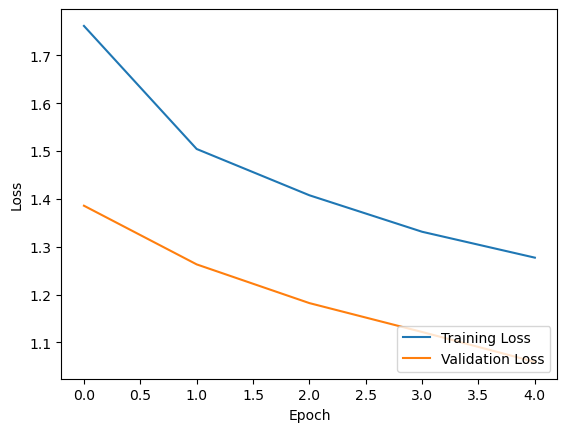

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the ConvNet architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Define a callback for early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')

# Train the model
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()